In [1]:
import numpy as np
import pandas as pd

# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Loading the datsets as dataframes

In [3]:
samsungMobilesData = pd.read_csv('/content/samsungMobilesData.csv')

# Exploring the datasets

In [7]:
samsungMobilesData.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [8]:
samsungMobilesData.shape

(407, 11)

In [9]:
samsungMobilesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             407 non-null    object 
 1   ratings          407 non-null    float64
 2   price            407 non-null    int64  
 3   imgURL           407 non-null    object 
 4   camera           407 non-null    int64  
 5   display          407 non-null    object 
 6   battery          407 non-null    int64  
 7   storage          407 non-null    int64  
 8   ram              407 non-null    int64  
 9   processor        407 non-null    object 
 10  android_version  407 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 35.1+ KB


# Proceeding with the samsungMobilesData dataset

In [10]:
samsungMobilesData.isnull().sum()

name               0
ratings            0
price              0
imgURL             0
camera             0
display            0
battery            0
storage            0
ram                0
processor          0
android_version    0
dtype: int64

In [11]:
samsungMobilesData.describe()

,ratings,price,camera,battery,storage,ram,android_version
count,407.00000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,4.19828,17363.245700,43.660934,4946.437346,106.199017,5.493857,10.847666
std,0.17762,6735.647203,25.189978,878.467561,58.899992,2.185789,1.829261
min,2.90000,6490.000000,0.000000,1500.000000,1.000000,1.000000,1.000000
25%,4.10000,11982.500000,20.000000,4500.000000,64.000000,4.000000,10.000000
50%,4.20000,15999.000000,48.000000,5000.000000,128.000000,6.000000,11.000000
75%,4.30000,21744.500000,50.000000,5500.000000,128.000000,6.000000,12.000000
max,4.80000,32000.000000,200.000000,7000.000000,512.000000,12.000000,13.000000


In [12]:
samsungMobilesData.drop(['imgURL','name'], axis = 1 , inplace = True)

In [13]:
samsungMobilesData.head()

,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,4.3,9499,50,other_types,6000,64,4,not mentioned,12
1,4.3,10499,50,other_types,6000,128,4,not mentioned,12
2,4.3,10499,50,other_types,6000,128,4,not mentioned,12
3,4.3,10499,50,other_types,6000,128,4,not mentioned,12
4,4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12


# Data Processing

In [14]:
samsungMobilesData['display'].value_counts()

display
other_types    250
LCD             70
HD+ AMOLED      43
AMOLED          39
TFT              5
Name: count, dtype: int64

In [15]:
samsungMobilesData['android_version'].value_counts()

android_version
12    117
11     95
10     75
13     56
9      29
8      15
6       6
7       6
4       3
5       3
1       2
Name: count, dtype: int64

In [16]:
samsungMobilesData['processor'].value_counts()

processor
not mentioned              274
MediaTek                    16
Gen8                        14
Dimensity1080,              12
Dimensity700                 9
Snapdragon720GProcessor      8
Snapdragon1P                 8
Snapdragon750GProcessor      7
Heilo80P                     7
Heilo356765                  7
Snapdragon(SDM450-F01)       7
Snapdragon695                5
Snapdragon450P               5
Dimensity720                 4
Snapdragon888                4
Heilo35P                     4
Snapdragon450                4
Snapdragon(SDM439)           4
Heilo806769                  2
Snapdragon750G               2
Snapdragon425P               2
Heilo67653512                1
Snapdragon410                1
Name: count, dtype: int64

In [17]:
samsungMobilesData['processor'] = samsungMobilesData['processor'].str.replace('Dimensity1080,' , 'Dimensity1080')
samsungMobilesData['processor'] = samsungMobilesData['processor'].str.replace('Snapdragon750GProcessor' , 'Snapdragon750G')
samsungMobilesData['processor'] = samsungMobilesData['processor'].str.replace('Snapdragon720GProcessor' , 'Snapdragon720G')
samsungMobilesData['processor'] = samsungMobilesData['processor'].str.replace('Snapdragon450P' , 'Snapdragon450')

In [18]:
samsungMobilesData['processor'].value_counts()

processor
not mentioned             274
MediaTek                   16
Gen8                       14
Dimensity1080              12
Snapdragon450               9
Snapdragon750G              9
Dimensity700                9
Snapdragon720G              8
Snapdragon1P                8
Heilo80P                    7
Snapdragon(SDM450-F01)      7
Heilo356765                 7
Snapdragon695               5
Snapdragon(SDM439)          4
Dimensity720                4
Snapdragon888               4
Heilo35P                    4
Heilo806769                 2
Snapdragon425P              2
Heilo67653512               1
Snapdragon410               1
Name: count, dtype: int64

In [19]:
samsungMobilesData.head()

,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,4.3,9499,50,other_types,6000,64,4,not mentioned,12
1,4.3,10499,50,other_types,6000,128,4,not mentioned,12
2,4.3,10499,50,other_types,6000,128,4,not mentioned,12
3,4.3,10499,50,other_types,6000,128,4,not mentioned,12
4,4.3,15499,50,other_types,5000,128,6,Snapdragon750G,12


In [20]:
# Encoding of categorical data
transformed_dataframe = pd.get_dummies(samsungMobilesData, columns = ['display', 'processor'], drop_first = True)

In [21]:
transformed_dataframe.head()

,ratings,price,camera,battery,storage,ram,android_version,display_HD+ AMOLED,display_LCD,display_TFT,...,processor_Snapdragon(SDM450-F01),processor_Snapdragon1P,processor_Snapdragon410,processor_Snapdragon425P,processor_Snapdragon450,processor_Snapdragon695,processor_Snapdragon720G,processor_Snapdragon750G,processor_Snapdragon888,processor_not mentioned
0,4.3,9499,50,6000,64,4,12,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,4.3,10499,50,6000,128,4,12,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,4.3,10499,50,6000,128,4,12,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4.3,10499,50,6000,128,4,12,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,4.3,15499,50,5000,128,6,12,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [23]:
# Dividing the datset into train and test
X = transformed_dataframe.drop('price', axis = 1)
y = transformed_dataframe['price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y, train_size = 0.7, random_state = 42)

In [24]:
# Scaling the datasets
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()

X_train = mmc.fit_transform(X_train)
X_test = mmc.transform(X_test)

Reshaping the training and test data into tensors

import numpy as np
y_train = [[item] for item in y_train]
y_train = np.reshape(y_train , (-1,1))
print(y_train.shape)

X_train = tf.reshape(X_train,[-1, 284, 32])
y_train = tf.reshape(y_train , [-1,284,1])

X_train.shape

# Creating the model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, PReLU, LeakyReLU, ELU
from tensorflow.keras.layers import Dropout

In [ ]:
!pip install optuna

In [27]:
import optuna

In [28]:
def objective(trial):
    neurons1 = trial.suggest_categorical('neurons1', [12, 24, 32, 64, 128, 256, 512, 1024, 2048])
    neurons2 = trial.suggest_categorical('neurons2', [8, 12, 24, 32, 64, 128, 256, 512, 1024])
    neurons3 = trial.suggest_categorical('neurons3', [8, 12, 24, 32, 64, 128, 256, 512, 1024])
    neurons4 = trial.suggest_categorical('neurons4', [8, 12, 24, 32, 64, 128, 256, 512, 1024])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    model = Sequential([
        Dense(neurons1, activation='relu'),
        Dense(neurons2, activation='relu'),
        Dense(neurons3, activation='relu'),
        Dense(neurons4, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
                  loss='mae',
                  metrics=['mae'])

    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=0)
    val_mae = history.history['val_mae'][-1]

    return val_mae

In [ ]:
study = optuna.create_study(direction='minimize')  # 'maximize' for accuracy, 'minimize' for loss
study.optimize(objective, n_trials=50)

In [30]:
print('Best parameters:', study.best_params)
print('MAE:', study.best_value)

Best parameters: {'neurons1': 512, 'neurons2': 512, 'neurons3': 256, 'neurons4': 256, 'learning_rate': 0.009602161909933104}
MAE: 2432.522216796875


In [ ]:
model = Sequential([
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(256, activation='relu'),
        Dense(1)
    ])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.009602161909933104),
              loss='mae',
              metrics=['mae'])

history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=1)

In [88]:
model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_357 (Dense)           (None, 512)               15872     
                                                                 
 dense_358 (Dense)           (None, 512)               262656    
                                                                 
 dense_359 (Dense)           (None, 256)               131328    
                                                                 
 dense_360 (Dense)           (None, 256)               65792     
                                                                 
 dense_361 (Dense)           (None, 1)                 257       
                                                                 
Total params: 475905 (1.82 MB)
Trainable params: 475905 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test MAE:', test_mae)
print('Train MAE:', history.history['mae'][-1])

4/4 [==============================] - 0s 6ms/step - loss: 2478.6975 - mae: 2478.6975
Test MAE: 2478.697509765625
Train MAE: 1394.64697265625


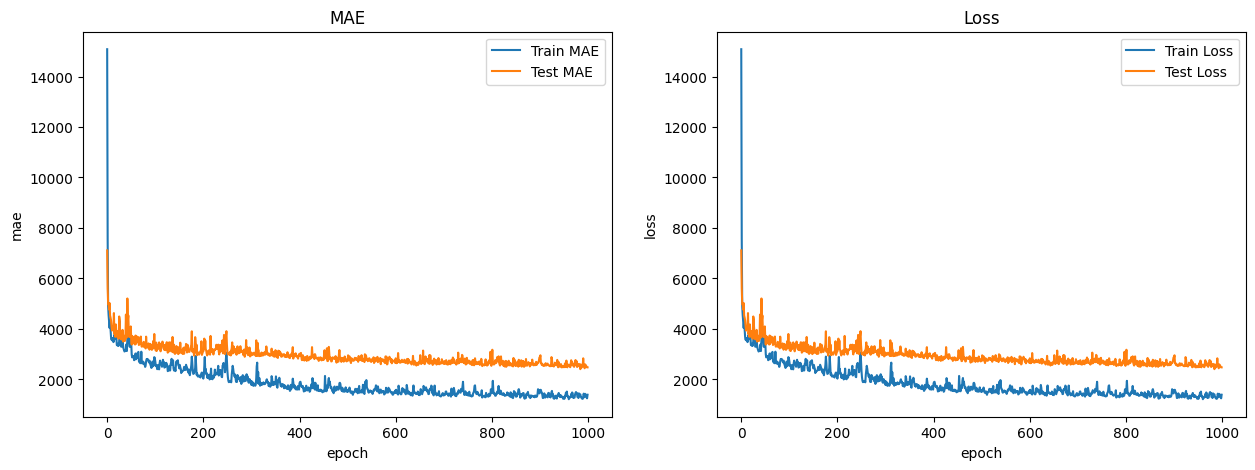

In [90]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [91]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [92]:
y_test.shape
y_test = [[item] for item in y_test]
y_test = np.reshape(y_test , (-1,1))

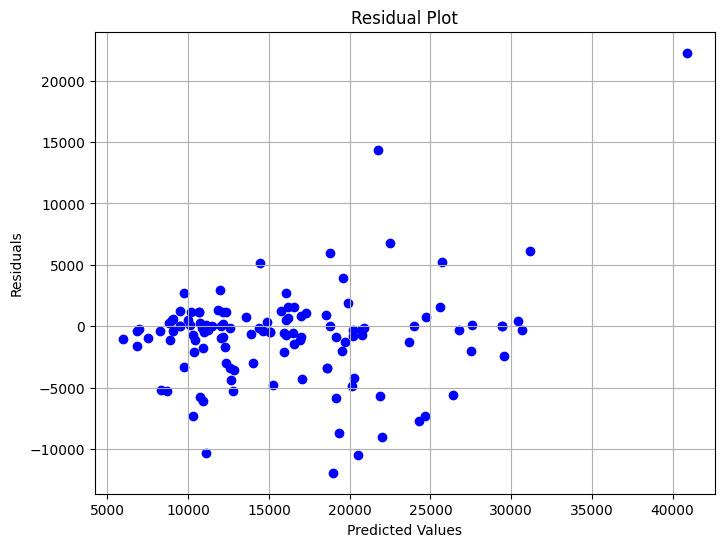

In [93]:
res = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, res, color = 'blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()